<a href="https://colab.research.google.com/github/Shubham04689/colab_notebooks/blob/main/Tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objective

At the end of the experiment, you will be able to:

*   visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying t-SNE algorithm
*   understand how the introduction of noise into data effects representation of data





## Dataset

### Description

The dataset choosen for this experiment is a swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just project a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like, geometry and similarity between points we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique


In this experiment, swiss roll data is a high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning is, **t-SNE**  which is a tool to visualize high-dimensional data by projecting it to low-dimensional data by converting similarities between data points to joint probabilities. These probabilities in the embedded space are represented by Student’s t-distributions.

Generally,  t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects in the higher dimension and the distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

 t-SNE maps the high-dimensional data to a low-dimensional space and attempts to find patterns in the data by identifying  clusters based on the similarity of data points.

## Importing required packages

In [1]:
import requests

def download_file(url, filename):
  """Downloads a file from a URL and saves it to a specified filename."""
  response = requests.get(url, stream=True)
  if response.status_code == 200:
    with open(filename, 'wb') as f:
      for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
    print(f"File downloaded successfully to: {filename}")
  else:
    print(f"Failed to download file. Status code: {response.status_code}")

url = "https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt"
filename = "AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt"

download_file(url, filename)

File downloaded successfully to: AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt


In [2]:
from sklearn.datasets import *
# Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Generate the swiss roll data

Note: Refer to [make_swiss_roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) from sklearn package

In [3]:
# Specify the number of data samples to be generated from swiss roll data
n_samples = 1500

'''We use make_swiss_roll method which takes the number of data samples and
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''

X, color = make_swiss_roll(n_samples)

In [4]:
# Print the shape of 'X' and 'color'
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in 'X' is labeled with a color label in 'color' variable.

**Note:** Here we are not using the label for classification purpose, but only for plotting swiss roll with different points which represents different set of colors

## TSNE

By using TSNE reduce the dimensions of data from higher to lower

**Note:** Refer [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) from sklearn

In [5]:
'''We use TSNE technique from manifold which takes as input
  the dimensions of the embedded space that the swiss roll data has to be transformed to'''

# Create an object for TSNE class
# Fit and transform the data to TSNE by calculating the joint probabilities between the data points

tsne_data = TSNE(n_components=2).fit_transform(X)

Let us visualize the  Swiss roll data

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying TSNE



In [6]:
from mpl_toolkits.mplot3d import Axes3D

def visualizeSwissRoll(tsne_data, X, color):
    fig = plt.figure(figsize=(20,18))
    ax = fig.add_subplot(2, 1, 1,projection='3d')
    ax.set_title('Here is the swiss roll manifold in 3D', fontsize=10)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = color, cmap="Accent", s=50) # We are picking up the x,y,z co-ordinate values from dataset X
    ax.view_init(azim=-77, elev=12) # To rotate the axe programmatically, ‘elev’ elevation angle, ‘azim’ azimuth angle.
    ax = fig.add_subplot(2, 1, 2)

    # Visualize the 2D plot after compressing the data using TSNE
    ax.set_title('After compressing with t-sne',  fontsize=10)
    ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c = color, cmap="Accent", s=60)

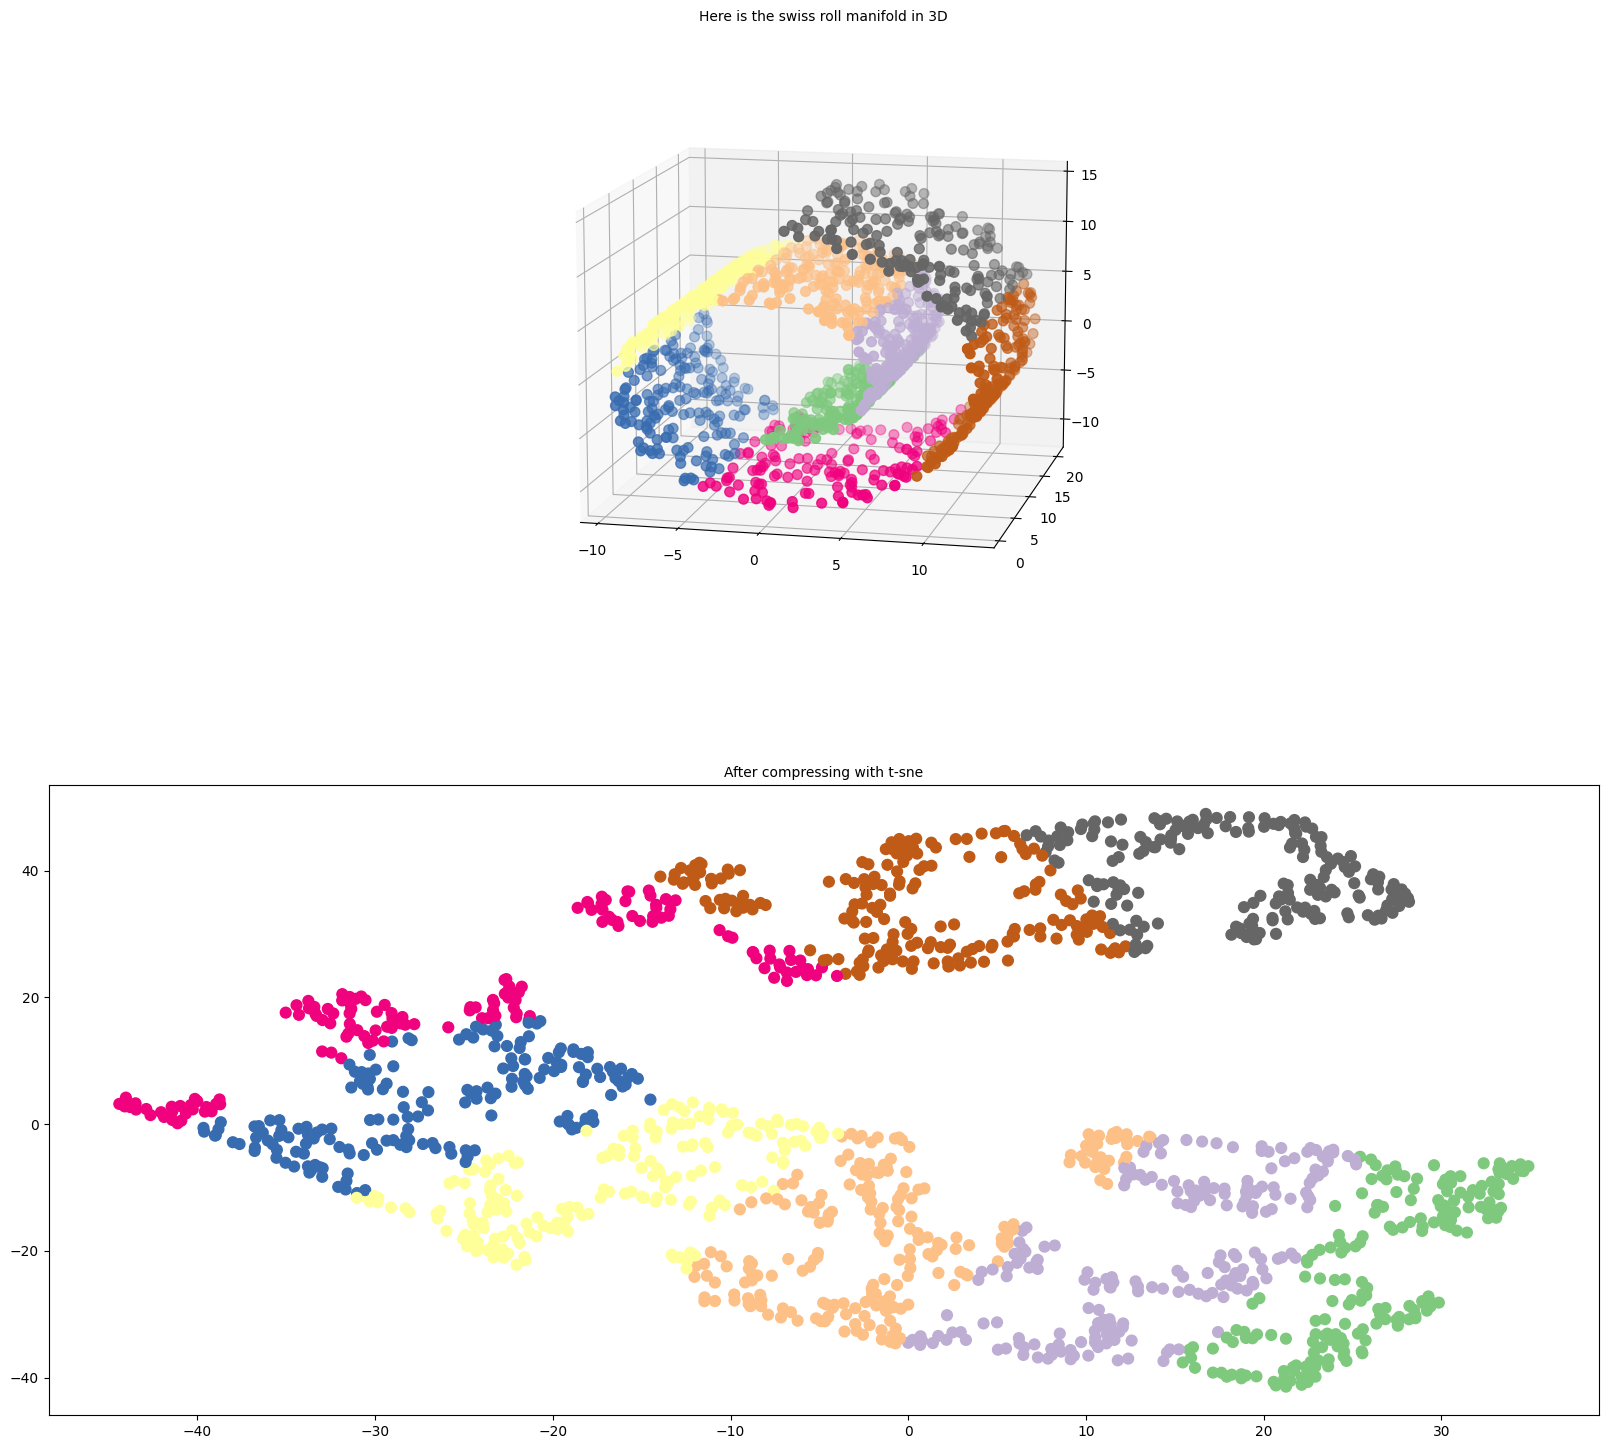

In [7]:
# Call the function to visualize the swissroll
visualizeSwissRoll(tsne_data, X, color)

Let us generate swiss roll data for 300 samples with some noise in it

In [8]:
''' make_swiss_roll allows you to pass a range of noisy samples along with n_samples
where the range of noise affects the variance around data samples'''

# Generating the swiss roll data by adding noise
ndata, colors = make_swiss_roll(n_samples= 300, noise=0.01 * 200)

Let us concatenate the noise data values and original data values

In [9]:
con_data =  np.concatenate((X, ndata), axis = 0) # X is orginal data and ndata is noise data
con_colors = np.concatenate((color, colors), axis = 0) # color is orginal and colors are noise

In [10]:
# Print the shape of 'con_data' and 'con_colors'
con_data.shape, con_colors.shape

((1800, 3), (1800,))

In [11]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''

# Create an object of TSNE class
# Fit and transform the concatenated noisy data to TSNE by calculating the joint probabilites between the data points

tsne_con_data = TSNE(n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying TSNE


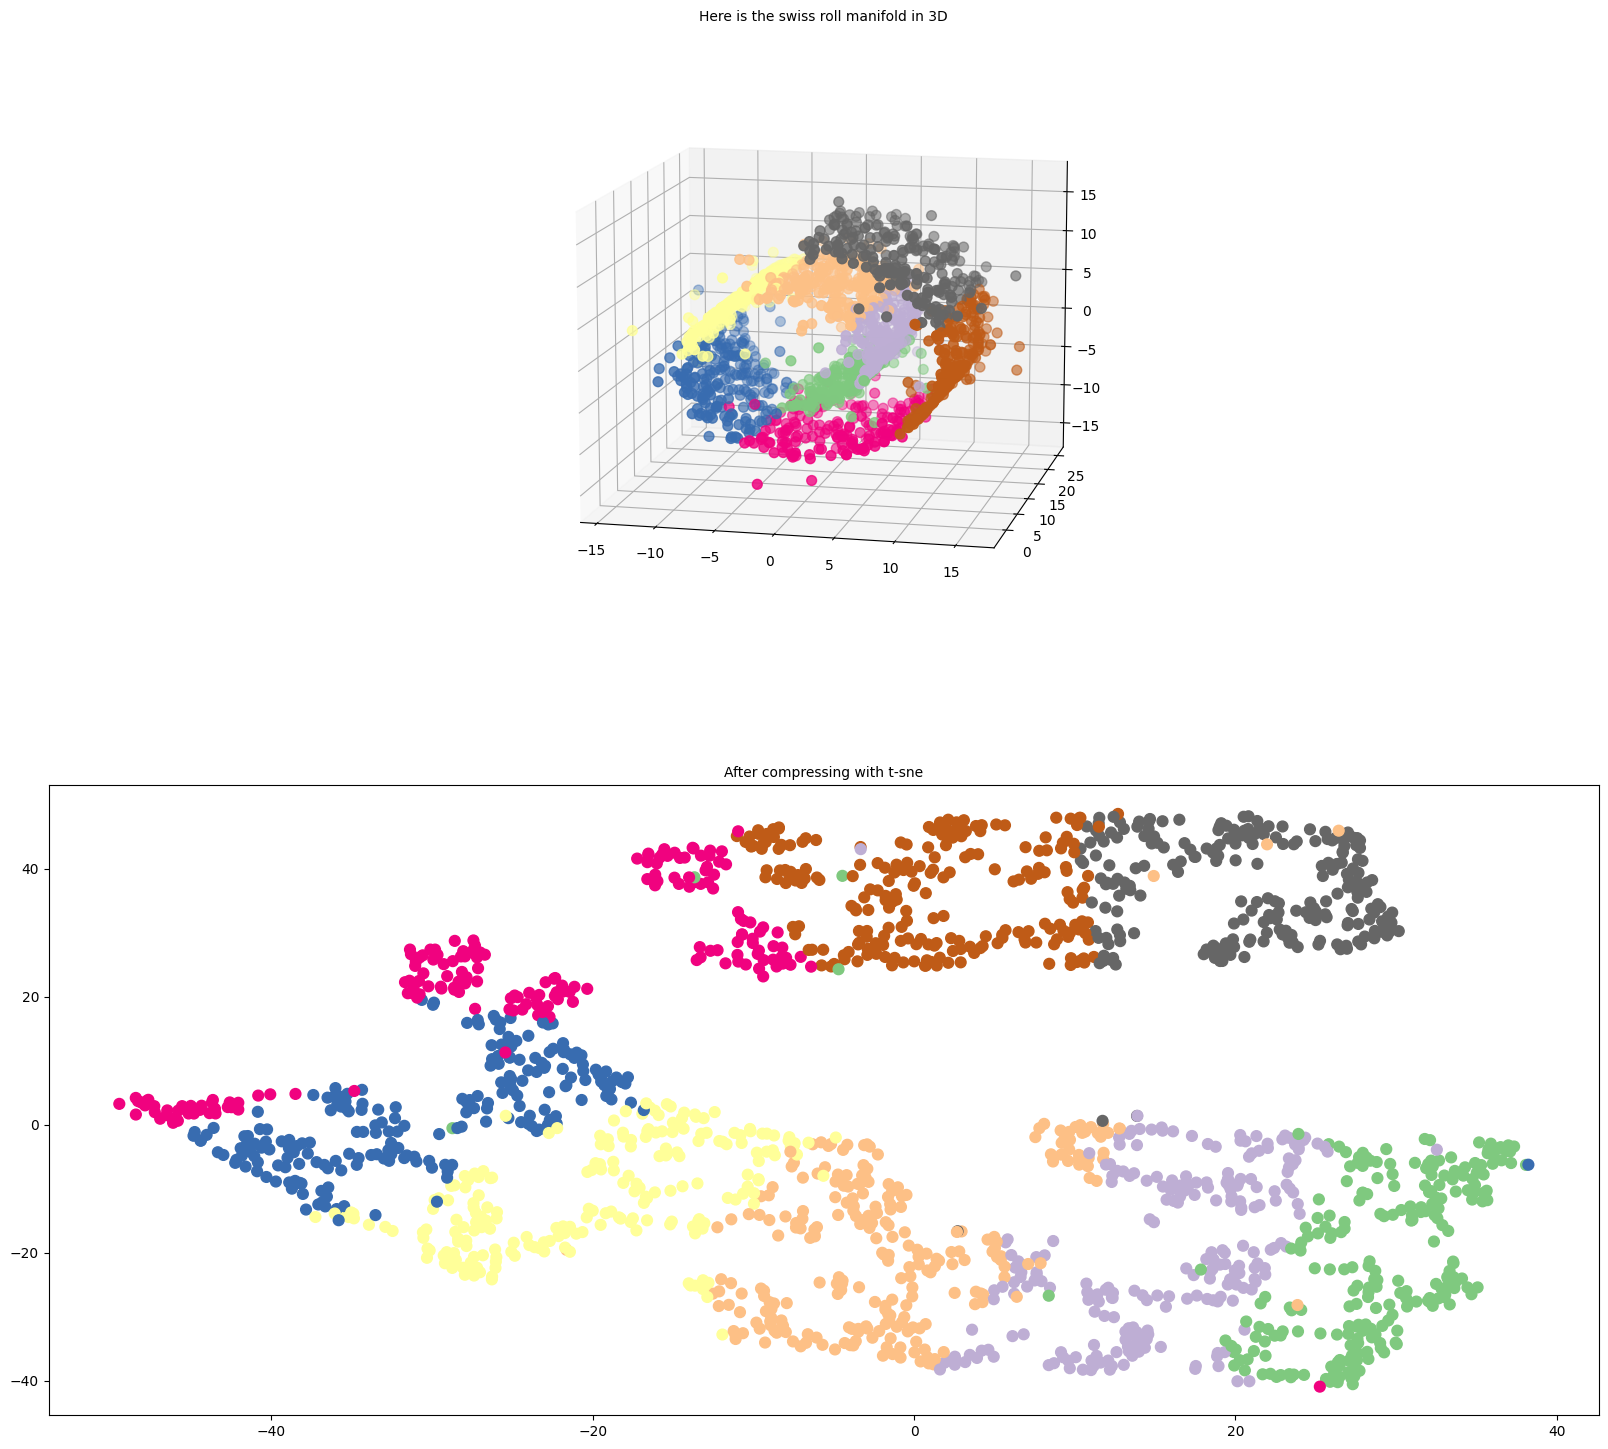

In [12]:
# Call the function by passing concatenated noisy data to visualize the swissroll
visualizeSwissRoll(tsne_con_data, con_data, con_colors)